In [17]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries for data pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler # standard score aka z score
from sklearn.preprocessing import LabelEncoder #Encode target labels with value between 0 and n_classes-1.
from sklearn.preprocessing import LabelBinarizer

plt.style.use('ggplot')

#Libraries for data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#For Decision Tree implementation
from scipy.stats import entropy
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#For KNN implementation
from sklearn.neighbors import KNeighborsClassifier

#For Bagging implementation
from sklearn.ensemble import BaggingClassifier

#For AdaBoost implementation
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

import matplotlib
import warnings
#import xgboost as xgb
#import lightgbm as lgb
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
from collections import Counter
from sklearn import metrics
from sklearn.linear_model import LinearRegression,LassoCV, Ridge, LassoLarsCV,ElasticNetCV
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook', palette='deep')
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [3]:
df = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')
df['month']=pd.to_datetime(df['month'])
df['month'].head()
df['Year'] = df['month'].apply(lambda x: x.year)
df['Month'] = df['month'].apply(lambda y: y.month)
df['years_left'] = df['Year'] - df['lease_commence_date']
df = df.drop(columns = ['month','block','lease_commence_date','Month','Year','remaining_lease'])

In [4]:
# Randomly sample 5 records with .sample(5)
df.sample(5)

,town,flat_type,street_name,storey_range,floor_area_sqm,flat_model,resale_price,years_left
34706,YISHUN,3 ROOM,YISHUN ST 71,07 TO 09,64.00,Simplified,250000.00,31
54125,TAMPINES,4 ROOM,TAMPINES ST 42,10 TO 12,104.00,Model A,440000.00,34
31215,JURONG EAST,EXECUTIVE,TEBAN GDNS RD,01 TO 03,150.00,Apartment,536000.00,32
54613,ANG MO KIO,4 ROOM,ANG MO KIO AVE 1,13 TO 15,91.00,New Generation,408000.00,37
53691,PUNGGOL,5 ROOM,PUNGGOL FIELD,01 TO 03,113.00,Premium Apartment,570000.00,6


In [5]:
# Check the columns using dtypes
print(df.dtypes)

town               object
flat_type          object
street_name        object
storey_range       object
floor_area_sqm    float64
flat_model         object
resale_price      float64
years_left          int64
dtype: object


# 2. Baseline Model (Decision Tree)
A simple/initial model that you compare your later/more complex models against. It is basically the benchmark for your problem statement.

#### Label Encoder for ordinal data columns

In [6]:
#technically town, flat_type, streets_name and flat_model have a "tier" of sort, some town are better areas to live,
#some flat_type are better,
for column in df.columns:
    if (df[column].dtype == type(object)) and (column != 'flat_type'):
        #Create the label encoder
        le = preprocessing.LabelEncoder()
        #Convert the non numeric data to numeric
        df[column] = le.fit_transform(df[column])

In [7]:
# Randomly sample 5 records with .sample(5)
df.sample(5)

,town,flat_type,street_name,storey_range,floor_area_sqm,flat_model,resale_price,years_left
18628,23,5 ROOM,236,4,132.00,7,622000.00,33
1534,10,4 ROOM,467,0,84.00,15,355000.00,32
41505,18,3 ROOM,93,4,60.00,16,305000.00,51
45682,13,4 ROOM,249,3,100.00,11,358888.00,34
50469,25,4 ROOM,516,4,92.00,3,618000.00,6


#### One Hot Encoder for nominal data columns

In [8]:
# #OneHotEncoder categorical nominal data column "town","flat_type","street_name","flat_model","Day of Week"
# cols = ["town","street_name","flat_model"]
# for i in cols:
#     labelbinarizer = LabelBinarizer()
#     x = labelbinarizer.fit_transform(df[i])
#     encoded_df = pd.DataFrame(x, columns=labelbinarizer.classes_)
#     df = pd.concat([df, encoded_df], axis=1)

### Building Decision Tree Model

In [9]:
df['flat_type'].unique()

array(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [10]:
#split dataset in features and target variable
feature_cols = ['town','street_name','storey_range','floor_area_sqm','flat_model','years_left','resale_price']
X = df[feature_cols]
#y = df[['flat_type']]
y = df['flat_type']

In [11]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

In [12]:
# initialise Decision Tree
#Using gini currently, can also use entropy or miclassification error.
clf = DecisionTreeClassifier(criterion='gini',random_state=0) 

# train model
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [13]:
# get predictions and compare results
predictions = clf.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
results_df.sample(100)

,Actual,Predicted
10767,5 ROOM,5 ROOM
30935,4 ROOM,4 ROOM
71628,4 ROOM,4 ROOM
63130,3 ROOM,3 ROOM
41768,4 ROOM,4 ROOM
...,...,...
28994,3 ROOM,3 ROOM
63932,5 ROOM,5 ROOM
59802,5 ROOM,5 ROOM
39587,5 ROOM,5 ROOM


In [14]:
# Accuracy
accuracy = accuracy_score(y_test,predictions)
print("Accuracy:",accuracy)

Accuracy: 0.9983438224577674


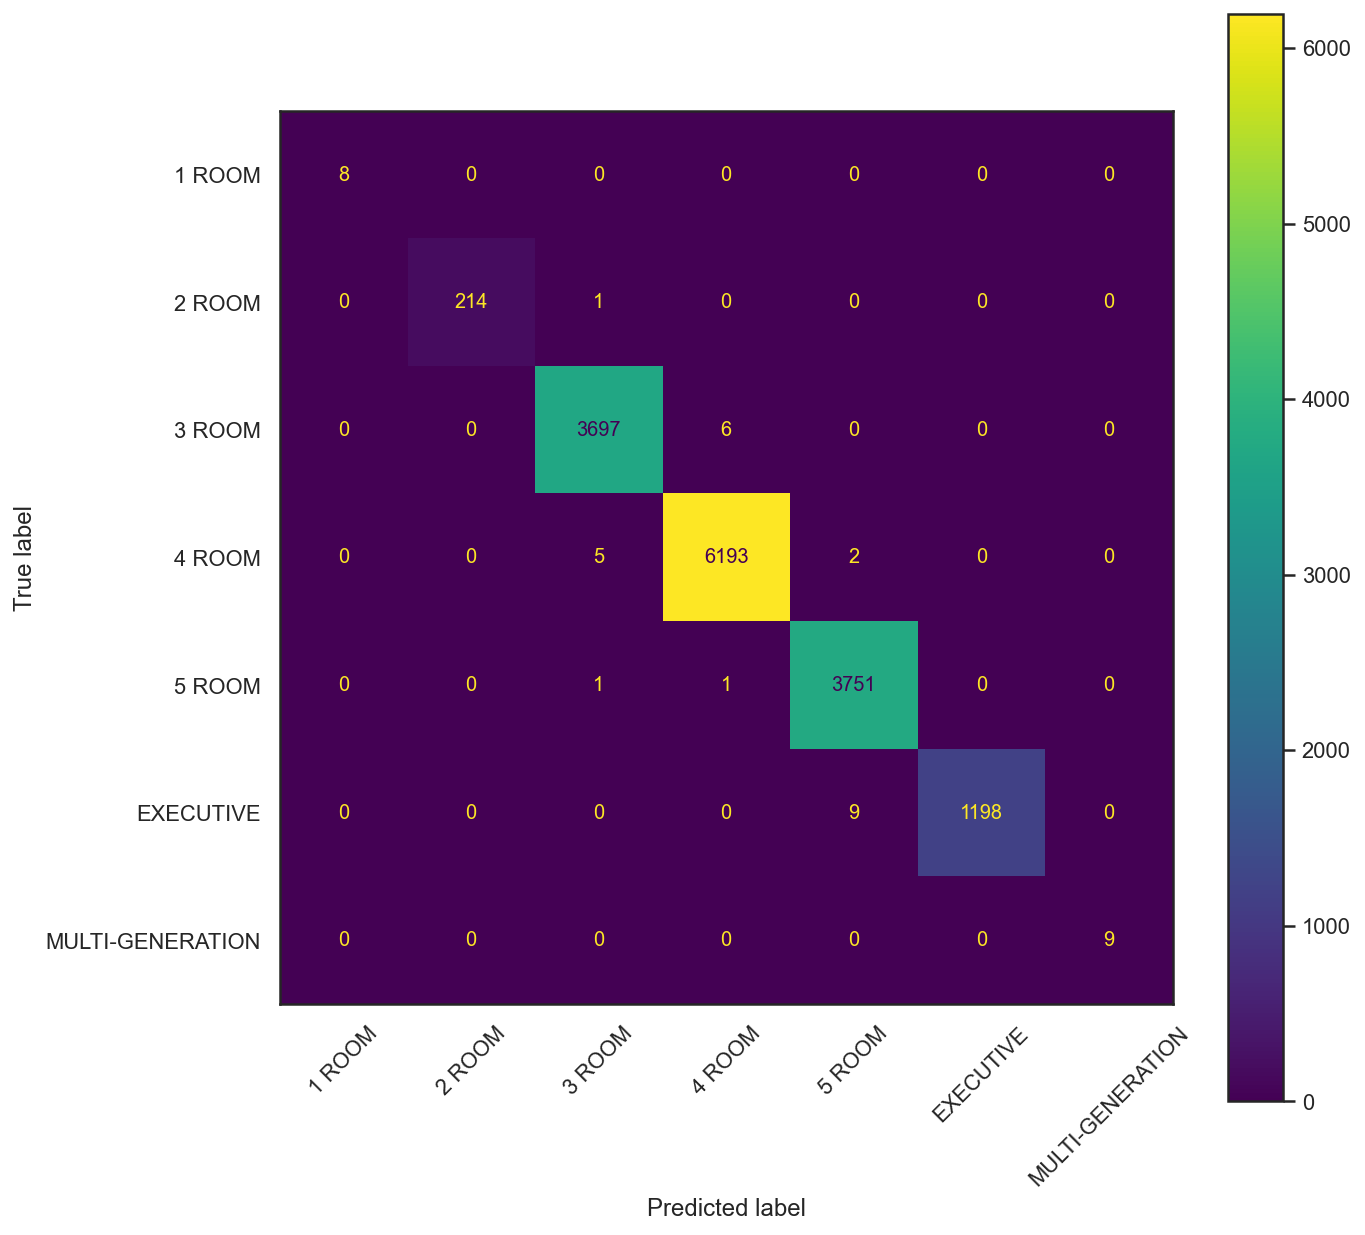

In [18]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(10, 10))

chart = plot_confusion_matrix(clf, X_test, y_test, ax=ax, xticks_rotation = 45);

In [54]:
# Precision = (True Positive)/(Total Predicted Positive)
# To determine if costs of False Positive is high.
precision = metrics.precision_score(y_test, predictions, average='micro')
precision1 = metrics.precision_score(y_test, predictions, average='macro')
precision2 = metrics.precision_score(y_test, predictions, average='weighted')

#Recall = (True Positive)/(Total Actual Positive)
# calculates the no. of Actual Positives our model capture through labeling it as Positive
recall = metrics.recall_score(y_test, predictions, average='micro')
recall1 = metrics.recall_score(y_test, predictions, average='macro')
recall2 = metrics.recall_score(y_test, predictions, average='weighted')

#F1-score = 2* (precision*recall)/(precision + recall)
# F1 Score is needed when you want to seek a balance between Precision and Recall.
f_measure = metrics.f1_score(y_test, predictions, average='micro')
f_measure1 = metrics.f1_score(y_test, predictions, average='macro')
f_measure2 = metrics.f1_score(y_test, predictions, average='weighted')

# https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9
print("Precision_micro:",precision)
print("Recall_micro:",recall)
print("F-measure_micro:",f_measure)

print("Precision1_macro:",precision1)
print("Recall1_macro:",recall1)
print("F-measure1_macro:",f_measure1)

print("Precision2_weighted:",precision2)
print("Recall2_weighted:",recall2)
print("F-measure2_weighted:",f_measure2)

Precision_micro: 0.9983438224577674
Recall_micro: 0.9983438224577674
F-measure_micro: 0.9983438224577674
Precision1_macro: 0.9991510203316648
Recall1_macro: 0.9978014409081093
F-measure1_macro: 0.9984732559360371
Precision2_weighted: 0.9983456909995552
Recall2_weighted: 0.9983438224577674
F-measure2_weighted: 0.9983432034820403


In [38]:
###################################################################################################################################


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0)


In [56]:
#Create the kNN classifier and set the number of neighbors to be 3. Note that you can tune this number of neighbors
model = KNeighborsClassifier(n_neighbors=3)

#Fit the training feature Xs and training label Ys
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [57]:
y_pred = model.predict(X_test)

In [61]:
# Find the confusion matrix of the result
cm = confusion_matrix(y_pred, y_test)
print(cm)

# Find the accuracy and F1 score of the result
asr = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test,average='micro')

# testing out different scores.
f2 = precision_score(y_pred, y_test,average='micro')
f3 = recall_score(y_pred, y_test,average='micro')

# testing out differet form of accuracy.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
# f2 = f1_score(y_pred, y_test,average='macro')
# f3 = f1_score(y_pred, y_test,average='weighted')

#The best f1_score is 1 and the worst value is 0.

print('accuracy: ',asr)
print('f1-Score: ',f1)
print('precision: ',f2)
print('recall: ',f3)

[[    7     7     9     0     0     0     0]
 [    1   281    95     4     1     0     0]
 [    3   306  7873   617    67    20     0]
 [    0    10  1062 13420  1542   258     4]
 [    0     0    68  1490  7245   825     7]
 [    0     0     8    97   482  1921     7]
 [    0     0     0     0     0     0     0]]
accuracy:  0.8147706494951904
f1-Score:  0.8147706494951904
precision:  0.8147706494951904
recall:  0.8147706494951904


## Bagging (with Decision Tree)

Refer to the following links on for detail explanation on the implementation:

In [20]:
#Create the Bagging classifier. Default base classifiers is Decision Tree. 
# - n_estimator is the number of base classifiers (i.e. weak learners)
model = BaggingClassifier(n_estimators=50)

#Fit the training feature Xs and training label Ys
model.fit(X_train, y_train)

BaggingClassifier(n_estimators=50)

In [21]:
#Use the trained model to predict the test data
y_pred = model.predict(X_test)

In [25]:
# Find the confusion matrix of the result
cm = confusion_matrix(y_pred, y_test)
print(cm)

# Find the accuracy and F1 score of the result
asr = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test,average='micro')
f1_macro = f1_score(y_pred, y_test,average='macro')
f1_weighted = f1_score(y_pred, y_test,average='weighted')


# testing out differet form of accuracy.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
# f2 = f1_score(y_pred, y_test,average='macro')
# f3 = f1_score(y_pred, y_test,average='weighted')
f2 = precision_score(y_pred, y_test,average='micro')
f2_macro = precision_score(y_pred, y_test,average='macro')
f2_weighted = precision_score(y_pred, y_test,average='weighted')

f3 = recall_score(y_pred, y_test,average='micro')
f3_macro = recall_score(y_pred, y_test,average='macro')
f3_weighted = recall_score(y_pred, y_test,average='weighted')

#The best f1_score is 1 and the worst value is 0.

print('Accuracy: ',asr)
print('F1-Score_micro: ',f1)
print('precision_micro: ',f2)
print('recall_micro: ',f3)
print('F1-Score_maro: ',f1_macro)
print('precision_macro: ',f2_macro)
print('recall_macro: ',f3_macro)
print('F1-Score_weighted: ',f1_weighted)
print('precision_weighted: ',f2_weighted)
print('recall_weighted: ',f3_weighted)

[[   8    0    0    0    0    0    0]
 [   0  214    0    0    0    0    0]
 [   0    1 3697    4    0    0    0]
 [   0    0    6 6195    1    0    0]
 [   0    0    0    1 3752    4    0]
 [   0    0    0    0    0 1203    0]
 [   0    0    0    0    0    0    9]]
Accuracy:  0.9988737992712818
F1-Score_micro:  0.9988737992712818
precision_micro:  0.9988737992712818
recall_micro:  0.9988737992712818
F1-Score_maro:  0.9989653204604059
precision_macro:  0.9984773746538631
recall_macro:  0.9994556944944196
F1-Score_weighted:  0.9988739756402286
precision_weighted:  0.9988749154528014
recall_weighted:  0.9988737992712818


In [23]:
# get predictions and compare results
predictions = model.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
results_df.sample(10)

,Actual,Predicted
62344,4 ROOM,4 ROOM
14657,4 ROOM,4 ROOM
29563,EXECUTIVE,EXECUTIVE
38754,4 ROOM,4 ROOM
27166,3 ROOM,3 ROOM
33326,4 ROOM,4 ROOM
18928,3 ROOM,3 ROOM
15965,4 ROOM,4 ROOM
4127,4 ROOM,4 ROOM
6087,4 ROOM,4 ROOM


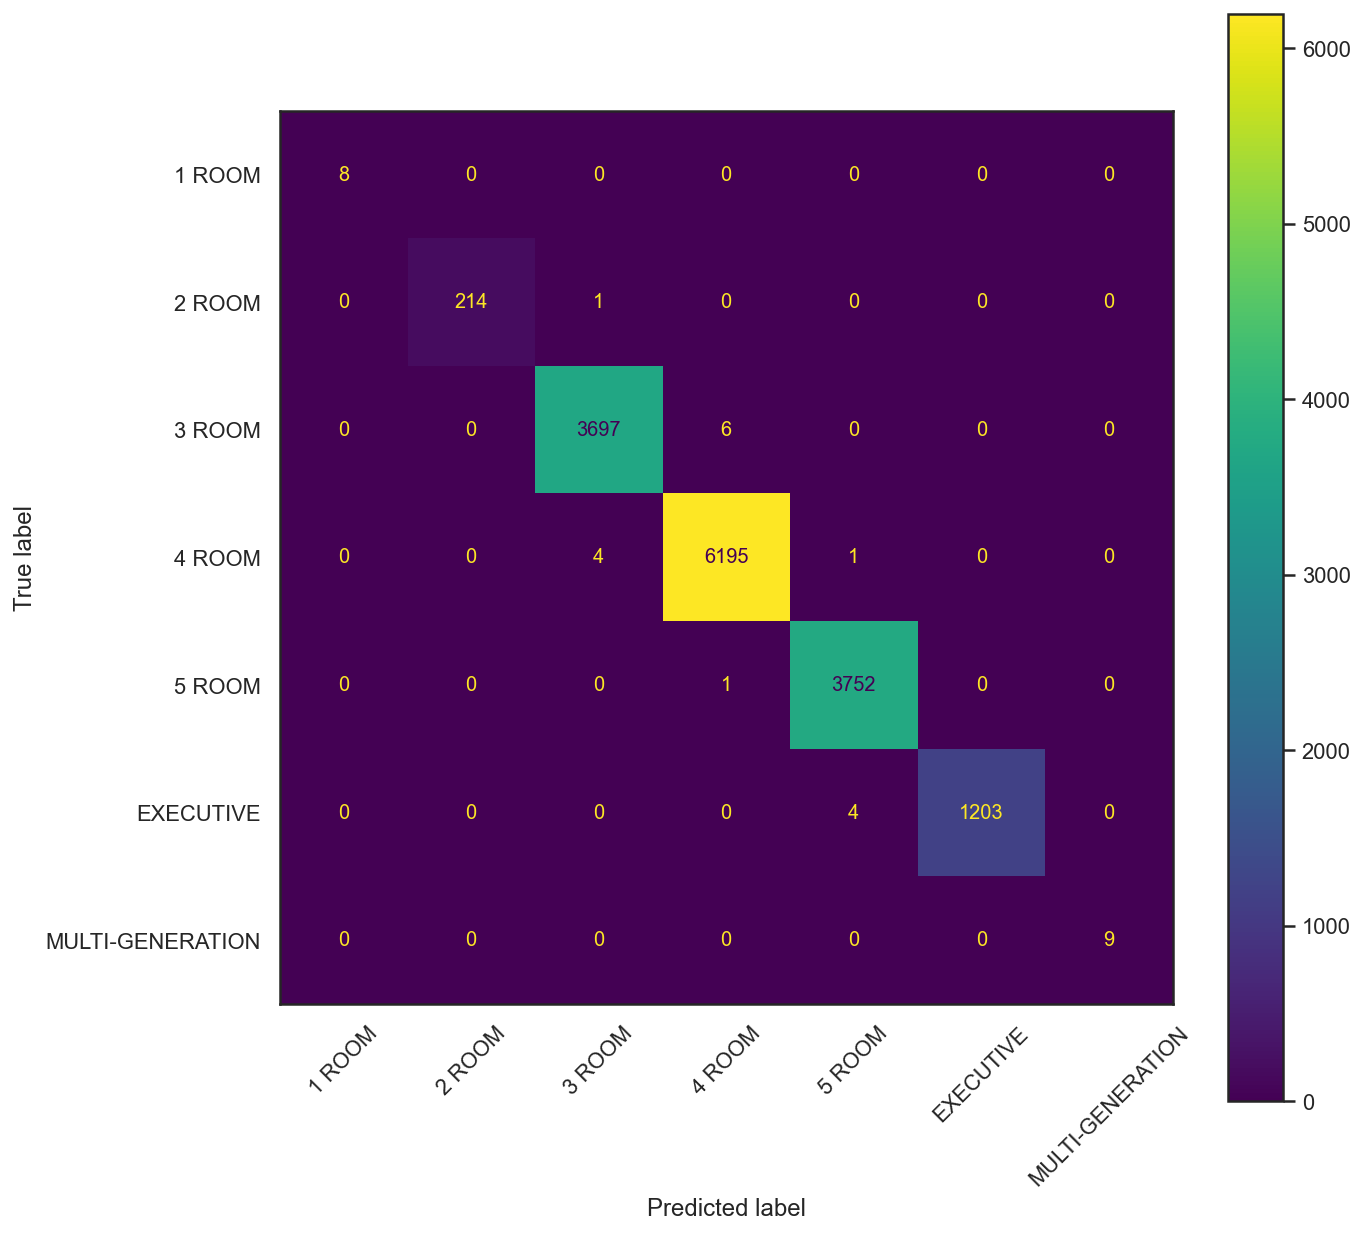

In [24]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(10, 10))

chart = plot_confusion_matrix(model, X_test, y_test, ax=ax, xticks_rotation = 45);

## Bagging (with kNN)

In [67]:
#Create the kNN base classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Create the Bagging classifier. Default base classifiers is Decision Tree. 
# - n_estimator is the number of base classifiers (i.e. weak learners)
model = BaggingClassifier(n_estimators=50, base_estimator=knn)

#Fit the training feature Xs and training label Ys
model.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=50)

In [68]:
# Find the confusion matrix of the result
cm = confusion_matrix(y_pred, y_test)
print(cm)

# Find the accuracy and F1 score of the result
asr = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test,average='micro')

# testing out differet form of accuracy.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
# f2 = f1_score(y_pred, y_test,average='macro')
# f3 = f1_score(y_pred, y_test,average='weighted')
f2 = precision_score(y_pred, y_test,pos_label='positive',average='micro')
f3 = recall_score(y_pred, y_test,pos_label='positive',average='micro')
#The best f1_score is 1 and the worst value is 0.

print('accuracy: ',asr)
print('f1-Score: ',f1)
print('precision: ',f2)
print('recall: ',f3)

[[   11     0     0     0     0     0     0]
 [    0   599     3     0     0     0     0]
 [    0     5  9086    13     0     0     0]
 [    0     0    24 15612     2     0     0]
 [    0     0     2     3  9327    10     0]
 [    0     0     0     0     8  3014     0]
 [    0     0     0     0     0     0    18]]
accuracy:  0.9981450565757745
f1-Score:  0.9981450565757745
precision:  0.9981450565757745
recall:  0.9981450565757745


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


## AdaBoost (with Decision Tree)


In [32]:
#Create the AdaBoost classifier. Default base classifiers is Decision Tree. 
# - n_estimator is the number of base classifiers (i.e. weak learners)
# - learning_rate controls the weight adjustments of each base classifiers. Default is 1
modelA = AdaBoostClassifier(n_estimators=50,learning_rate=0.1)

#Fit the training feature Xs and training label Ys
modelA.fit(X_train, y_train)

#Use the trained modelA to predict the test data
y_pred = modelA.predict(X_test)

In [33]:
# Find the confusion matrix of the result
cm = confusion_matrix(y_pred, y_test)
print(cm)

# Find the accuracy and F1 score of the result
# Find the accuracy and F1 score of the result
asr = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test,average='micro')
f1_macro = f1_score(y_pred, y_test,average='macro')
f1_weighted = f1_score(y_pred, y_test,average='weighted')


# testing out differet form of accuracy.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
# f2 = f1_score(y_pred, y_test,average='macro')
# f3 = f1_score(y_pred, y_test,average='weighted')
f2 = precision_score(y_pred, y_test,average='micro')
f2_macro = precision_score(y_pred, y_test,average='macro')
f2_weighted = precision_score(y_pred, y_test,average='weighted')

f3 = recall_score(y_pred, y_test,average='micro')
f3_macro = recall_score(y_pred, y_test,average='macro')
f3_weighted = recall_score(y_pred, y_test,average='weighted')

#The best f1_score is 1 and the worst value is 0.

print('Accuracy: ',asr)
print('F1-Score_micro: ',f1)
print('precision_micro: ',f2)
print('recall_micro: ',f3)
print('F1-Score_maro: ',f1_macro)
print('precision_macro: ',f2_macro)
print('recall_macro: ',f3_macro)
print('F1-Score_weighted: ',f1_weighted)
print('precision_weighted: ',f2_weighted)
print('recall_weighted: ',f3_weighted)

[[   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]
 [   8  214  505   14    0    0    0]
 [   0    1 3191 6068   57    0    0]
 [   0    0    7  118 3696 1207    9]
 [   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]]
Accuracy:  0.6802914872474329
F1-Score_micro:  0.6802914872474329
precision_micro:  0.6802914872474329
recall_micro:  0.6802914872474329
F1-Score_maro:  0.2643340432292151
precision_macro:  0.2999853913031859
recall_macro:  0.2952234534188178
F1-Score_weighted:  0.7745095034041863
precision_weighted:  0.9393965826989025
recall_weighted:  0.6802914872474329


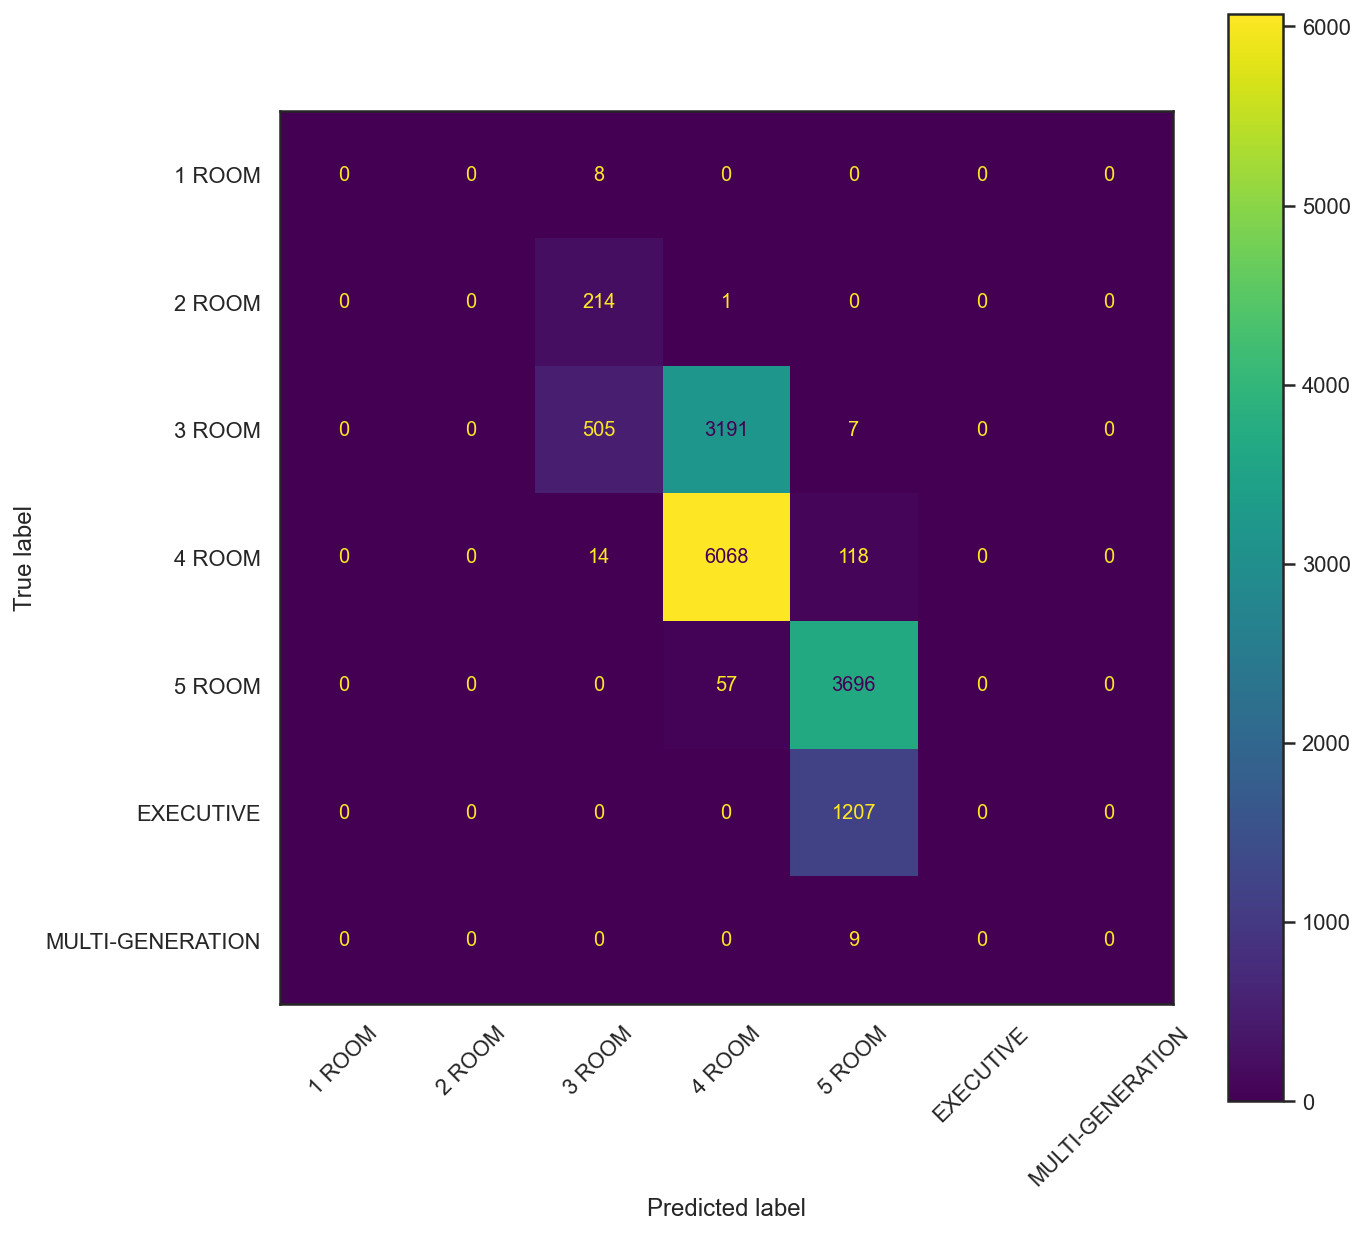

In [34]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(10, 10))

chart = plot_confusion_matrix(modelA, X_test, y_test, ax=ax, xticks_rotation = 45);

## AdaBoost (with Gaussian Navie Bayes)
Refer to the following links on for detail explanation on the implementation:

In [114]:
model = GaussianNB()
#Fit the training feature Xs and training label Ys
model.fit(X_train, y_train)

GaussianNB()

In [119]:
#Use the trained model to predict the test data
y_pred = model.predict(X_test)
# Find the confusion matrix of the result
cm = confusion_matrix(y_pred, y_test)
print(cm)

# Find the accuracy and F1 score of the result
asr = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test,average='micro')

# testing out differet form of accuracy.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
f2 = f1_score(y_pred, y_test,average='macro')
f3 = f1_score(y_pred, y_test,average='weighted')

#The best f1_score is 1 and the worst value is 0.

print('accuracy: ',asr)
print('f1-Score: ',f1)
print('precision: ',f2)
print('recall: ',f3)

[[  403     0     0     0     0     0     0]
 [    2  1784   317     0     0     0     0]
 [    0   256 54464  2713     0     0     0]
 [    0     0  1795 45692   686     0     0]
 [    0     0    24   743 22577    37    15]
 [    0     0     9     0   945 10859    94]
 [    0     0    19     0     0   131    35]]
asr:  0.9457799442896936
f1:  0.9457799442896936
f2:  0.8372868390668112
f3:  0.945701144101097


In [120]:
nb = GaussianNB()

model = AdaBoostClassifier(n_estimators=50,learning_rate=1, base_estimator=nb)
#model = BaggingClassifier(n_estimators=50, base_estimator=knn)


#Fit the training feature Xs and training label Ys
model.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=GaussianNB(), learning_rate=1)

In [124]:
#Use the trained model to predict the test data
y_pred = model.predict(X_test)
# Find the confusion matrix of the result
cm = confusion_matrix(y_pred, y_test)
print(cm)

# Find the accuracy and F1 score of the result
asr = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test,average='micro')

# testing out differet form of accuracy.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
f2 = f1_score(y_pred, y_test,average='macro')
f3 = f1_score(y_pred, y_test,average='weighted')

#The best f1_score is 1 and the worst value is 0.

print('asr: ',asr)
print('f1: ',f1)
print('f2: ',f2)
print('f3: ',f3)

[[  336     0     0     0     0     0     0]
 [   51  1340   883     0     0     0     0]
 [   18   700 54470 14346   154     0     0]
 [    0     0  1256 30205  3582     0     0]
 [    0     0    14  4591 17629  1430    17]
 [    0     0     5     6  2843  9588   106]
 [    0     0     0     0     0     9    21]]
asr:  0.7910097493036212
f1:  0.7910097493036212
f2:  0.6998741020796836
f3:  0.7981375336134957
